In [7]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = (x_train/255)
x_test = (x_test/255)

In [4]:
noise = np.random.uniform(0, .8, x_train.shape)

In [5]:
x_train_noised = x_train + noise

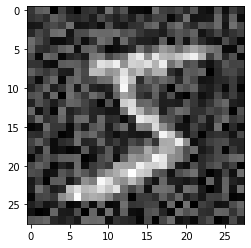

In [8]:
plt.imshow(x_train_noised[0], cmap="gray")

In [11]:
encoding_dim = 32

# encoder
input_img = keras.Input(shape=(28, 28))
reshape_flat = layers.Reshape([28, 28, 1])(input_img)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(reshape_flat)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
encoder = keras.Model(input_img, encoded)

# decoder
input_encoded = keras.Input(shape=[7, 7, 32])
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
reshape_flat = layers.Reshape([28, 28])(decoded)
decoder = keras.Model(input_encoded, reshape_flat)

# autoencoder
autoencoder = keras.models.Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

In [12]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Functional)         (None, 7, 7, 32)          9568      
_________________________________________________________________
model_3 (Functional)         (None, 28, 28)            18785     
Total params: 28,353
Trainable params: 28,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
autoencoder.fit(x_train_noised, x_train, batch_size=500, epochs=10)

Epoch 1/10
120/120 [==============================] - 60s 493ms/step - loss: 0.2673
Epoch 2/10
120/120 [==============================] - 92s 766ms/step - loss: 0.1121
Epoch 3/10
120/120 [==============================] - 108s 902ms/step - loss: 0.0971
Epoch 4/10
120/120 [==============================] - 91s 759ms/step - loss: 0.0919
Epoch 5/10
120/120 [==============================] - 70s 585ms/step - loss: 0.0893
Epoch 6/10
120/120 [==============================] - 93s 781ms/step - loss: 0.0875
Epoch 7/10
120/120 [==============================] - 79s 661ms/step - loss: 0.0861
Epoch 8/10
120/120 [==============================] - 58s 482ms/step - loss: 0.0853
Epoch 9/10
120/120 [==============================] - 57s 473ms/step - loss: 0.0845
Epoch 10/10
120/120 [==============================] - 57s 479ms/step - loss: 0.0838


In [32]:
outs = autoencoder.predict(x_train_noised[:5])

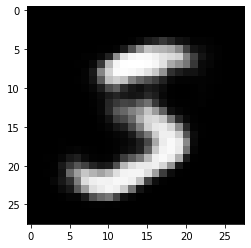

In [36]:
plt.imshow(outs[0], cmap="gray")

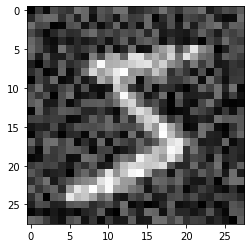

In [37]:
plt.imshow(x_train_noised[0], cmap="gray")